# Lab | Customer Analysis Round 4

       Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage Education Effective To Date EmploymentStatus Gender  ...  \
0         B

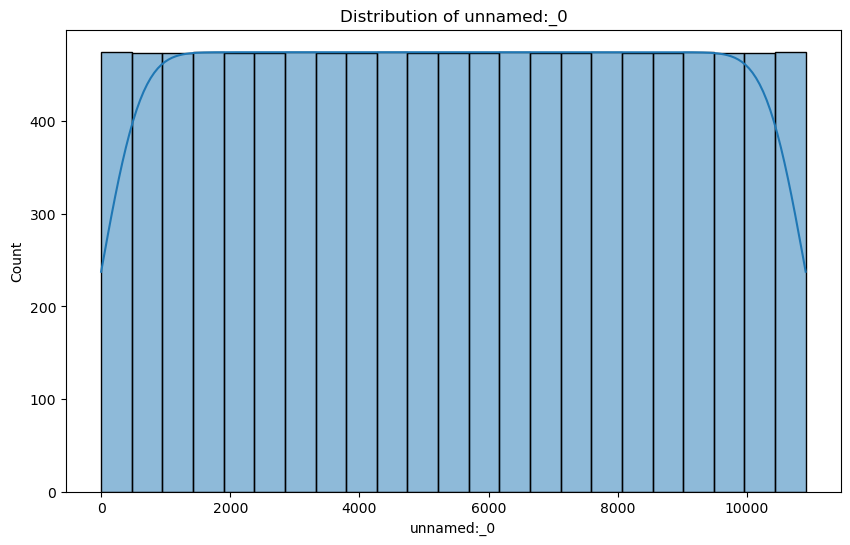

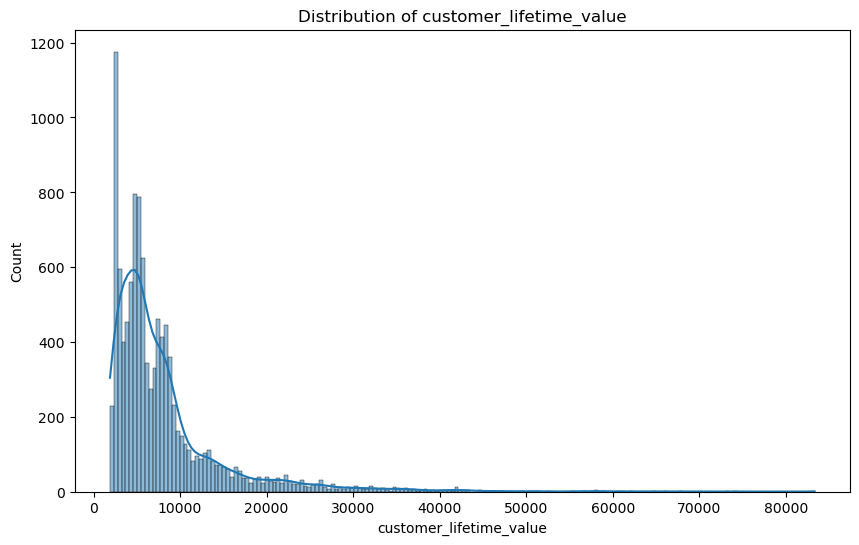

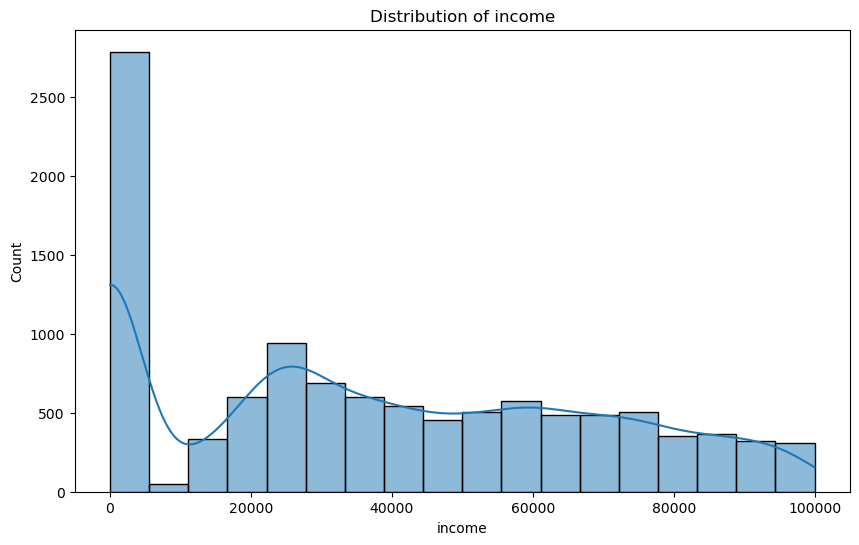

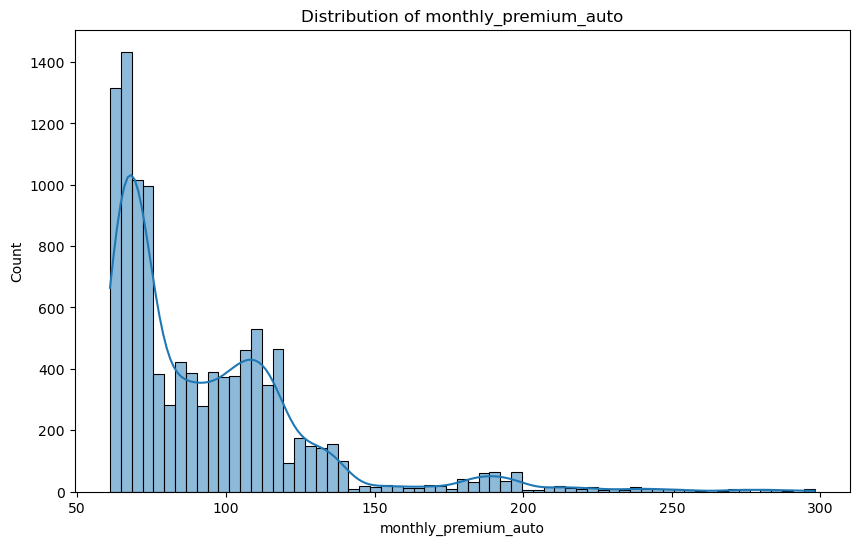

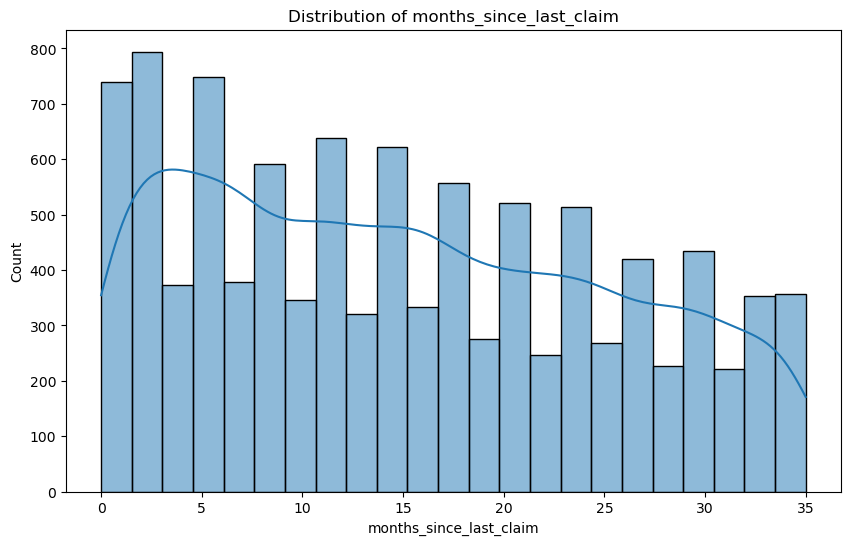

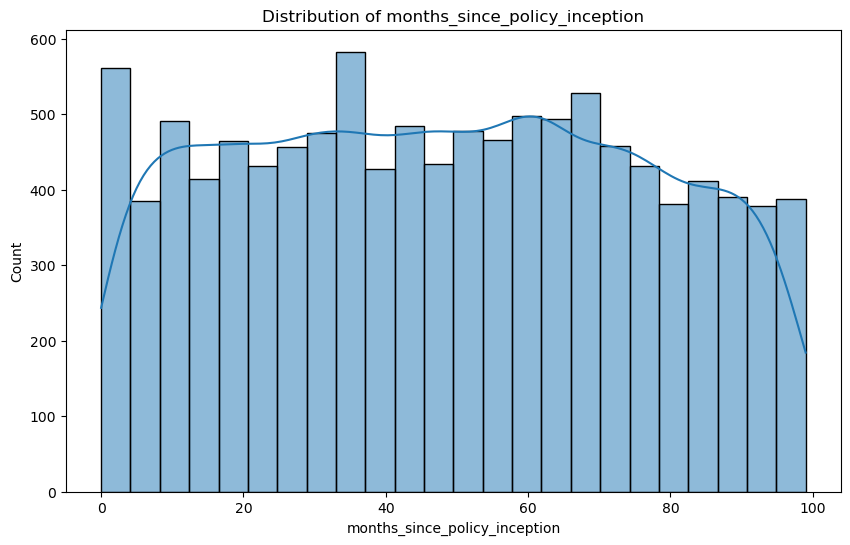

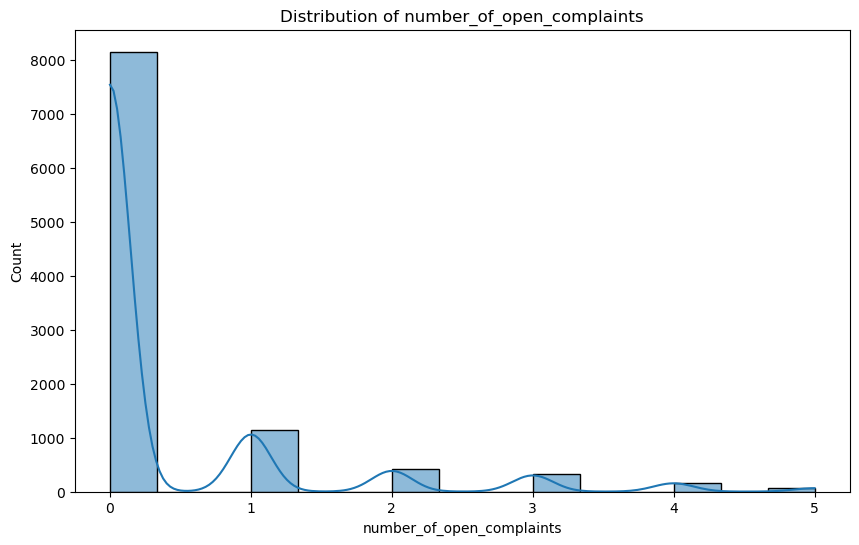

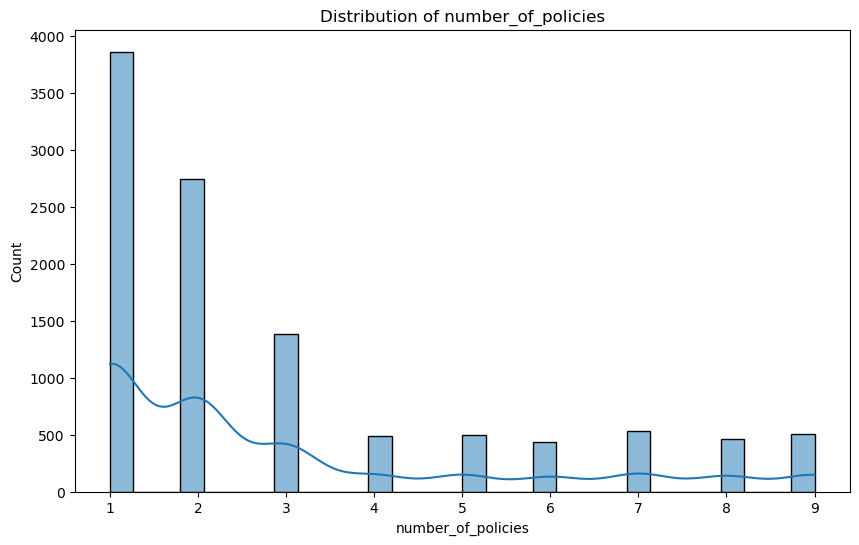

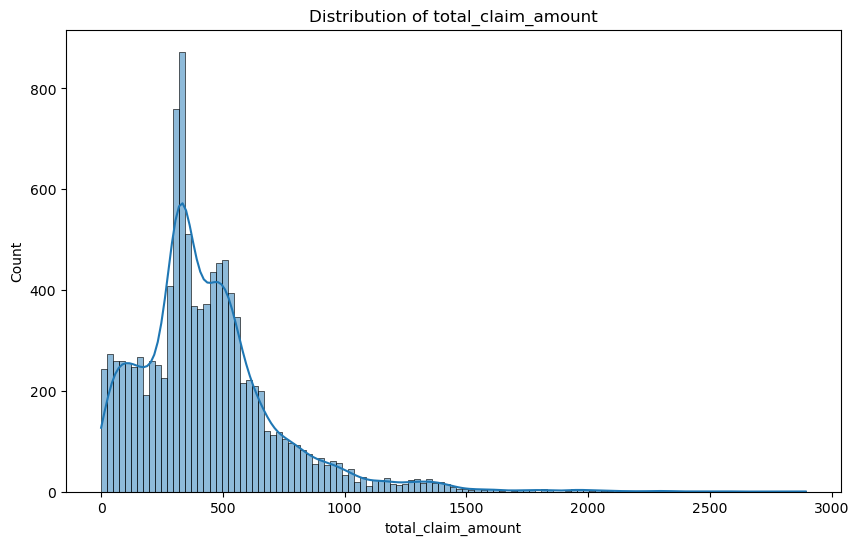

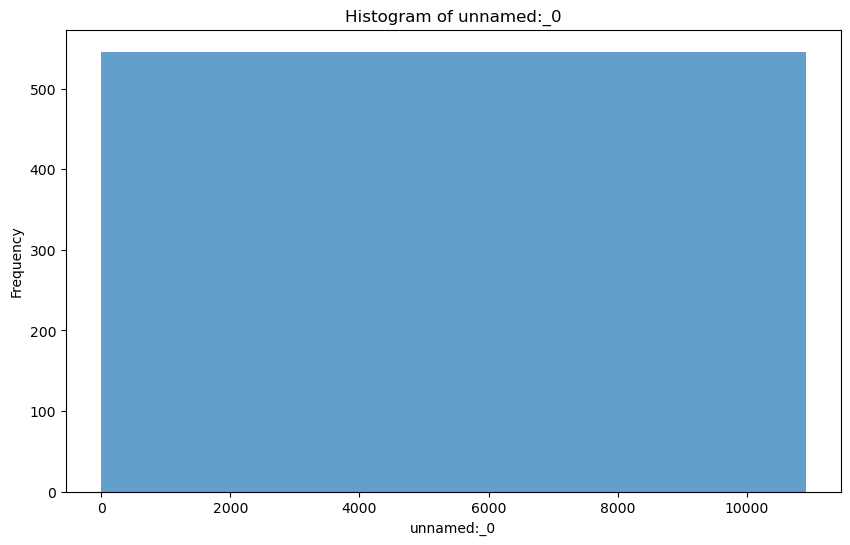

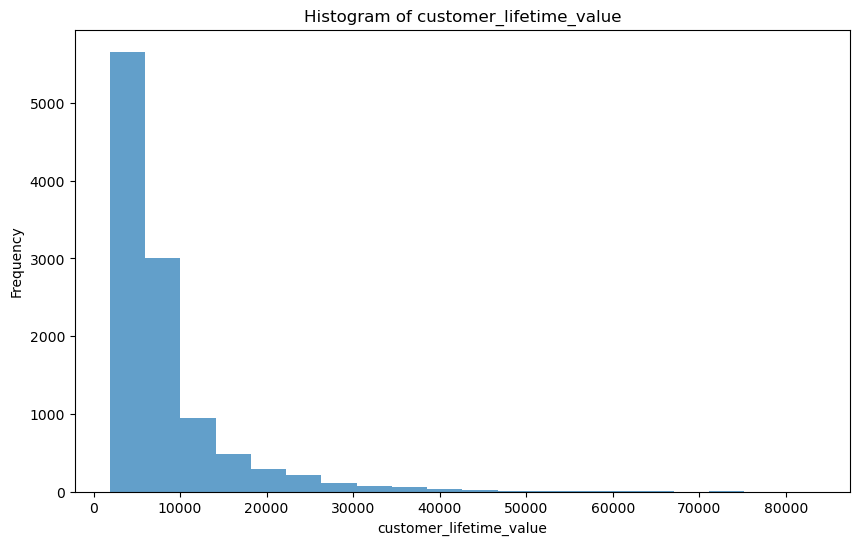

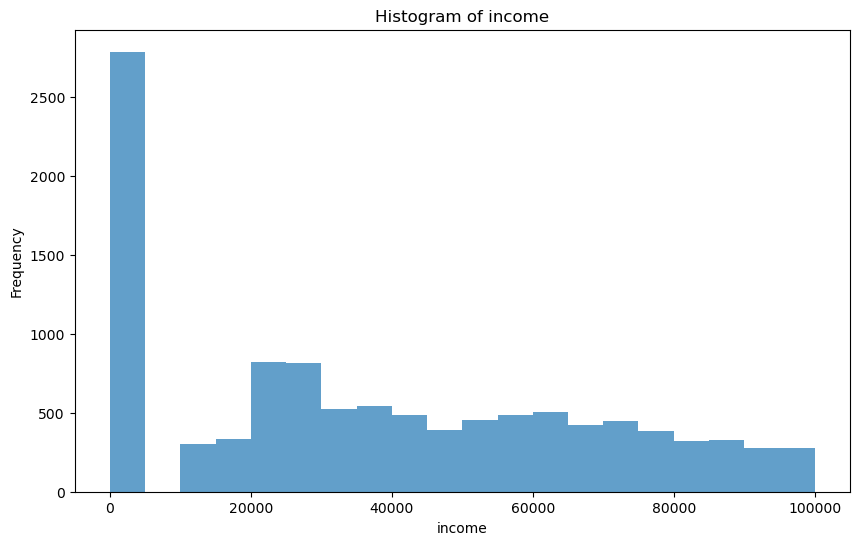

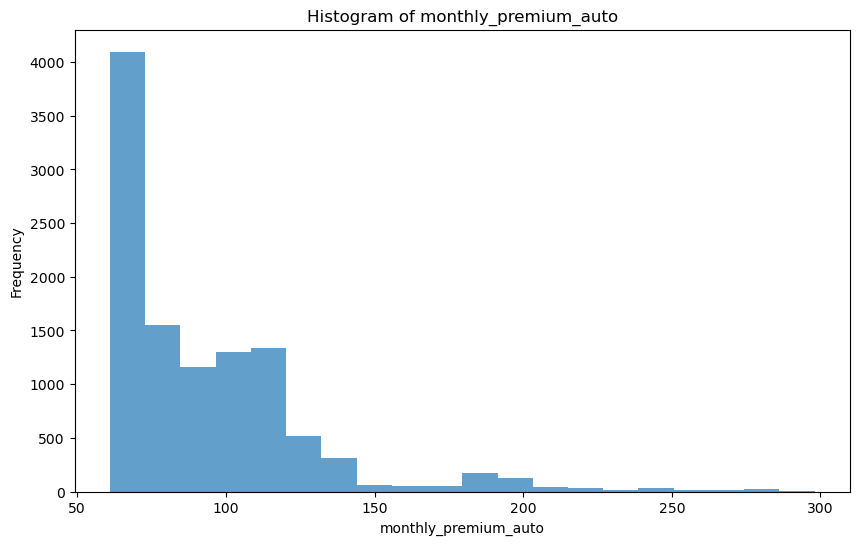

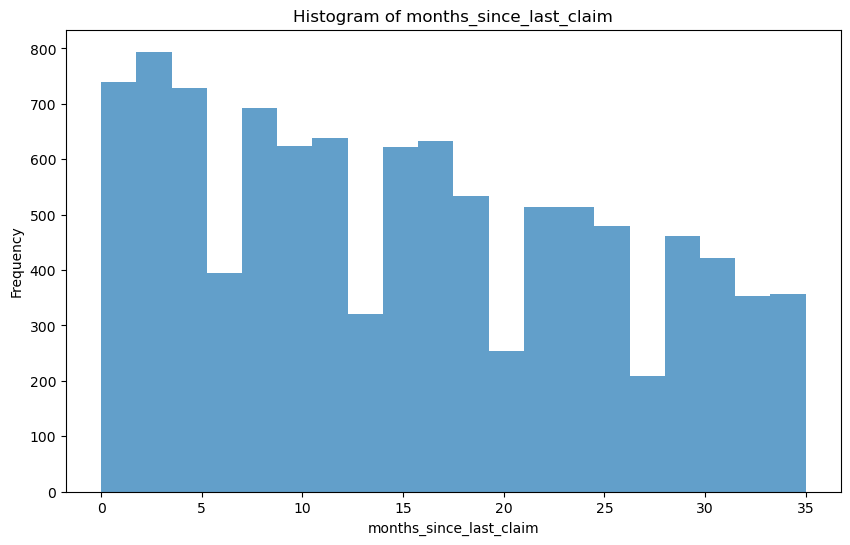

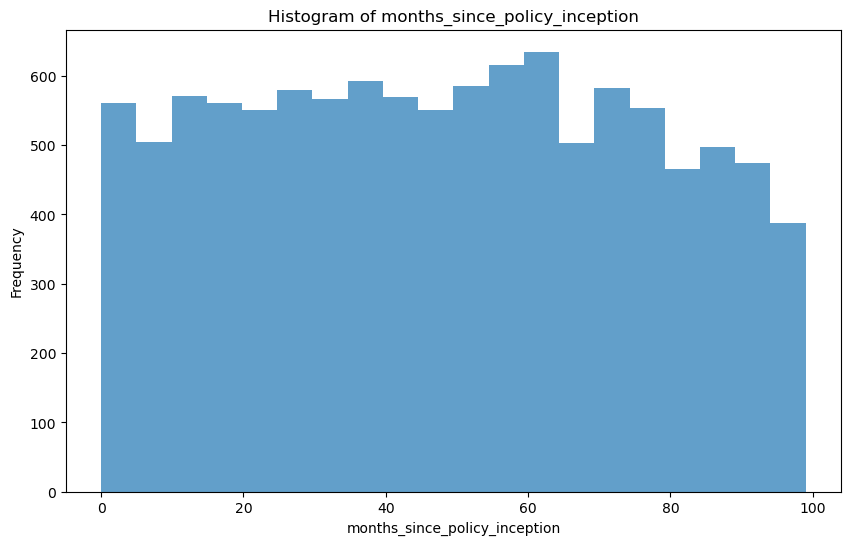

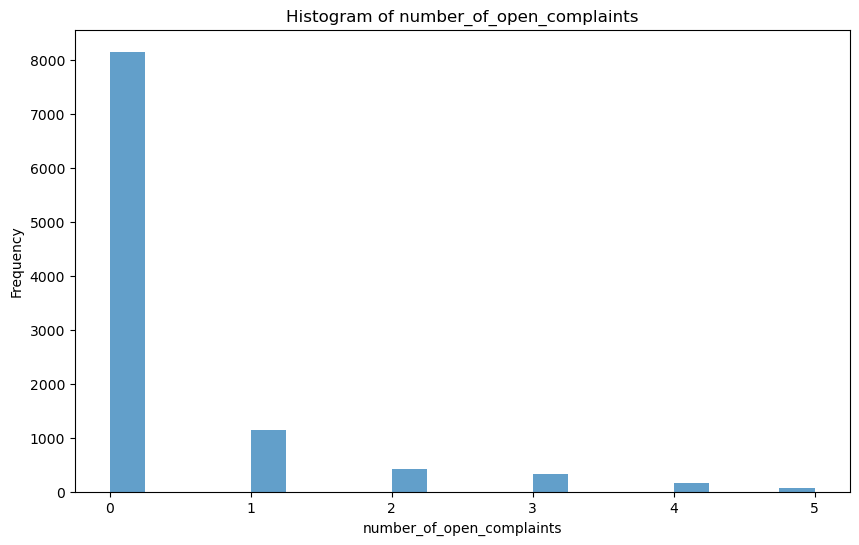

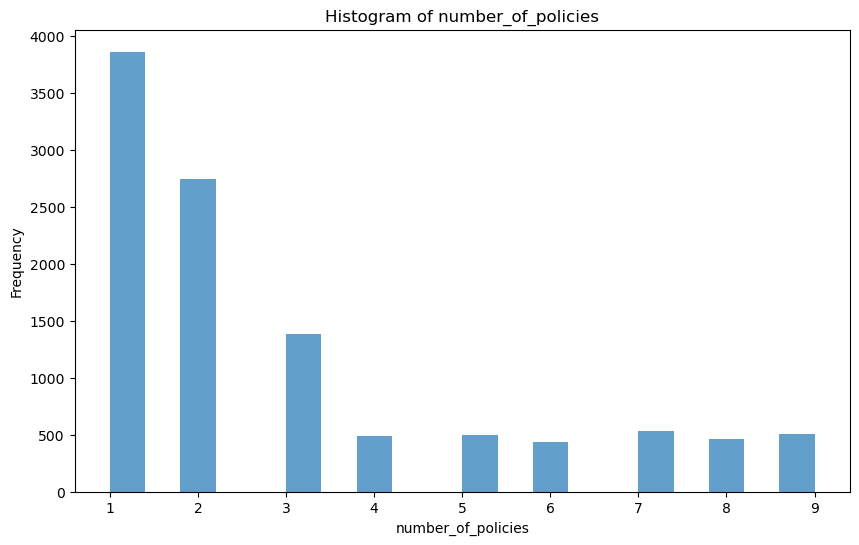

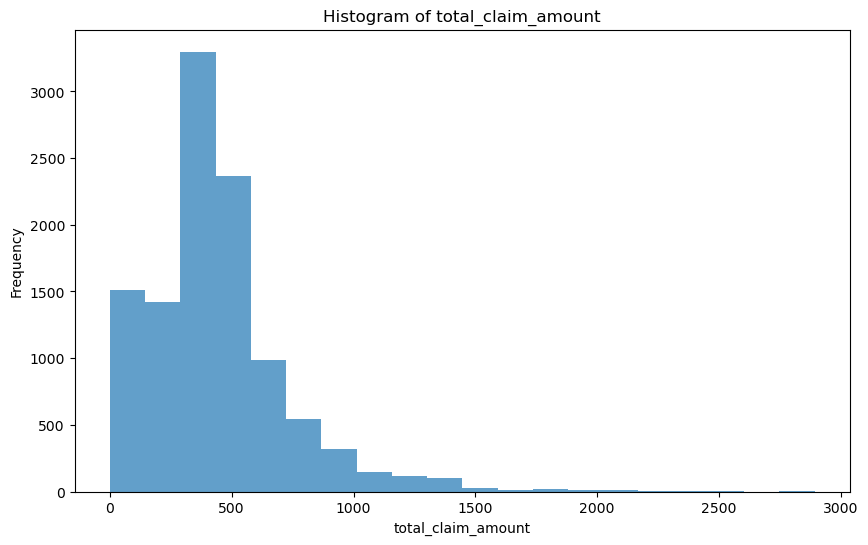

                         feature        VIF
0                          const  20.088068
1                     unnamed:_0   1.000371
2        customer_lifetime_value   1.197828
3                         income   1.002214
4           monthly_premium_auto   1.195894
5        months_since_last_claim   1.002425
6  months_since_policy_inception   1.002270
7      number_of_open_complaints   1.001168
8             number_of_policies   1.001404


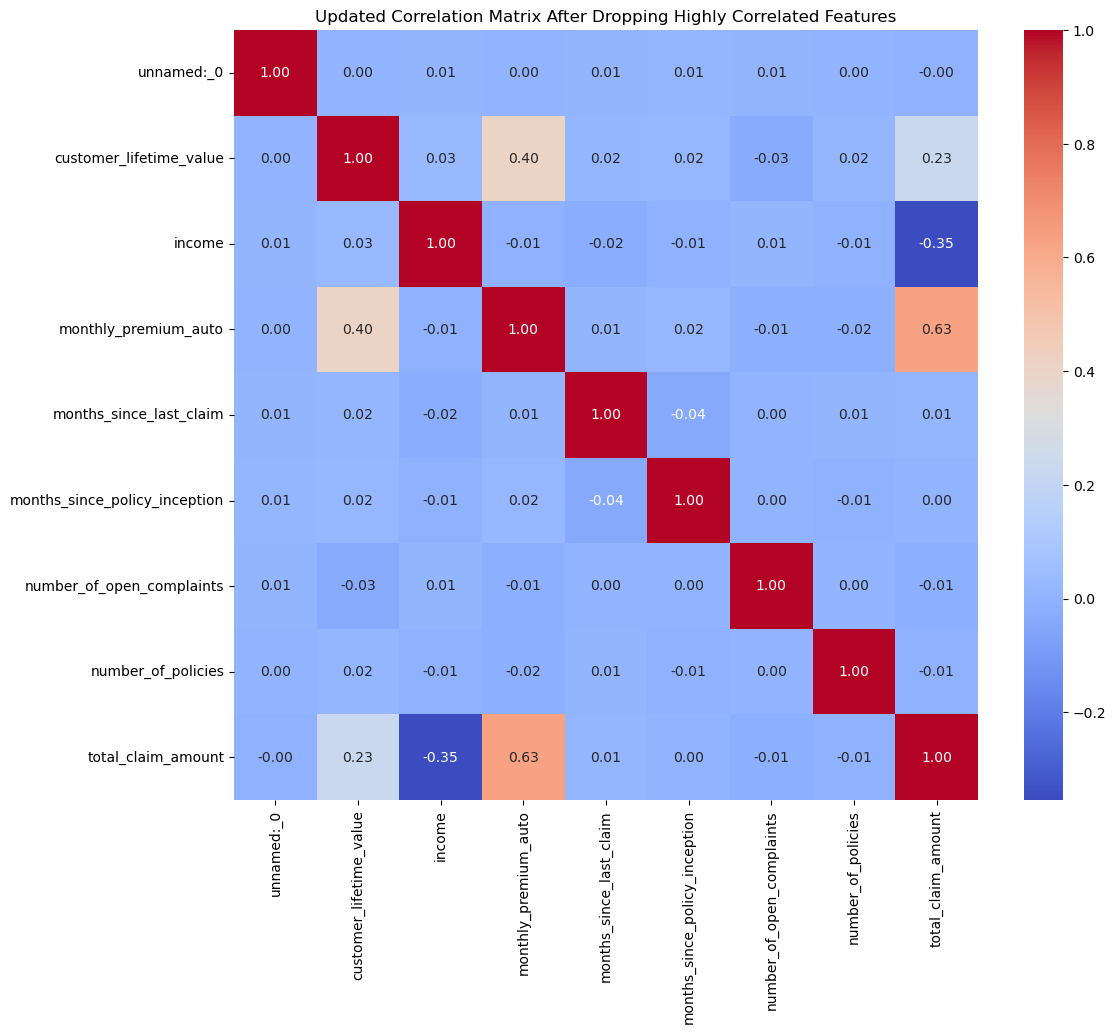

In [21]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

file1_path = r"C:\Users\ashis\Downloads\marketing_customer_analysis.csv"
df = pd.read_csv(file1_path)
print(df)

print("Shape of the DataFrame:", df.shape)

df.columns = df.columns.str.lower().str.replace(' ', '_')


print(df.dtypes)

# Get numerical data into a DataFrame called 'numerical'
numerical = df.select_dtypes(include=[np.number])

# Get categorical data into a DataFrame called 'categoricals'
categoricals = df.select_dtypes(include=[object])

# Display the first few rows of each DataFrame to verify
print("Numerical Data:")
print(numerical.head())

print("\nCategorical Data:")
print(categoricals.head())


for column in numerical.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(numerical[column], kde=True) 
    plt.title('Distribution of ' + column)
    plt.show()
    
for column in numerical.columns:
    plt.figure(figsize=(10,6))
    plt.hist(numerical[column], bins=20, alpha=0.7)  # 'bins' controls the number of bins in the histogram, and 'alpha' controls the transparency
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    
# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.     
  # Ensure 'X' only contains features for the VIF calculation (excluding target and added constant)
if 'total_claim_amount' in X:
    X = X.drop(columns=['total_claim_amount'])

# Recalculate VIF
# Note: Reinitialize vif_data AFTER finalizing 'X'
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
})

print(vif_data)  

# Drop one of the two features that show a high correlation between them (greater than 0.9).Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

# Calculate the correlation matrix
correlation_matrix = numerical.corr()

# Identify pairs of features with high correlation (greater than 0.9 but not equal to 1)
highly_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9 and abs(correlation_matrix.iloc[i, j]) < 1:
            # Add one of each pair to the set of features to drop (choosing arbitrarily)
            highly_corr_features.add(correlation_matrix.columns[i])

# Drop the identified features from the numerical DataFrame
numerical.drop(columns=list(highly_corr_features), inplace=True)

# Recalculate the correlation matrix after dropping the features
updated_corr_matrix = numerical.corr()

# Plotting the updated correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(updated_corr_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Updated Correlation Matrix After Dropping Highly Correlated Features')
plt.show()